# 5.1

In [1]:
from sympy import *
init_printing()
from dtumathtools import *

In [13]:
x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

k2, k3, k4, k5 = symbols('k_2 k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_re = re(f * (cos(w*t) + I*sin(w*t)))
f_sol = solve([Eq(f_re[0], ft[0]), Eq(f_re[1], ft[1])], [f1, f2])
f_til = f.subs(f_sol)
K_til = K + FFHM
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
la = symbols('lambda')
A = - M.inv() * K_til
AE = A - eye(2) * la

In [ ]:
mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A = A_func.subs(mydict)
display(A)

⎡-4296.14915128205                               3569.29775641026             
⎢                                                                             
⎣1141.84397163121   -146.572104018913⋅F_{0s} - 1.41843971631206⋅kₛ⋅(ⅈ⋅η + 1) -

                 ⎤
                 ⎥
 1652.48226950355⎦

In [20]:
v30 = {ks:0.83, eta:33, Fs0:5.2}
v50 = {ks:0.995, eta:21, Fs0:8}
v70 = {ks:1.37, eta:10.5, Fs0:9.65}

A30 = A.subs(v30)
A50 = A.subs(v50)
A70 = A.subs(v70)

In [87]:
a, b, c, d, f1_tilde = symbols('a b c d f1_tilde')
s1,s2 = symbols('s_1 s_2', real=False)

def sensitivitet(A):
    V = Matrix([[A.eigenvects()[0][2][0][0],A.eigenvects()[0][2][0][1]],[A.eigenvects()[1][2][0][0],A.eigenvects()[1][2][0][1]]]) 
    # Dette er en matrix med egebnvektorer som søjler

    # Vi skal nu finde sensitiviteterne for de to egebnvektorer
    s = Matrix([s1,s2])

    f_til = (Matrix([l2**(-1)*u*w**2*(sin(phiu)-I*cos(phiu)),0])).subs(mydict)


    løs = simplify(solve(Eq(V*s,f_til),s))

    return expand(s.subs(løs.subs(w,1)))
# modulus af s, kan bruges som indikator på sensitiviteten

# Disse to skal plottes med indsatte værdier fra dictiornary, samt for variende temperaturer 30,50 og 70 grader. omega (w) sættes til 1 rad/s.

In [89]:
display("s for 30 grader",
    sensitivitet(A30),
    "s for 50 grader",
    sensitivitet(A50),
    "s for 70 grader",
    sensitivitet(A70))

's for 30 grader'

⎡-2.80648875108297e-6 + 3.19664487930644e-6⋅ⅈ⎤
⎢                                            ⎥
⎣3.19409839507999e-6 - 3.57475962009612e-6⋅ⅈ ⎦

's for 50 grader'

⎡-2.675588157201e-6 + 3.05569252840234e-6⋅ⅈ ⎤
⎢                                           ⎥
⎣3.33823759266101e-6 - 3.75983394807659e-6⋅ⅈ⎦

's for 70 grader'

⎡2.59574760343039e-6 - 2.96180136062119e-6⋅ⅈ⎤
⎢                                           ⎥
⎣-3.42038292746006e-6 + 3.8648666055965e-6⋅ⅈ⎦

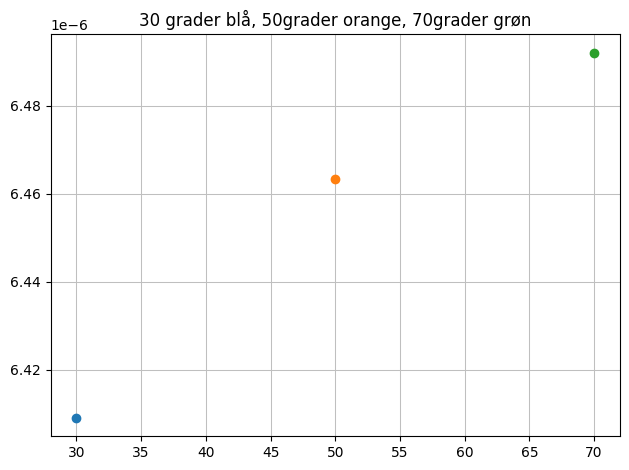

In [104]:
p1 = dtuplot.scatter(30,sensitivitet(A30).norm(),title="30 grader blå, 50grader orange, 70grader grøn",show = False)
p2 = dtuplot.scatter(50,sensitivitet(A50).norm(),show = False)
p3 = dtuplot.scatter(70,sensitivitet(A70).norm(),show = False)

(p1+p2+p3).show()

Des højere temperatur, des højere sensitivitet har egensvingningsformerne over for den ydre kraftpåvirkning